# Bossom Bank PLC - Online Payment Fraud Detection
     prepared by Edidiong Udoh

### PROBLEM STATEMENT: 

Experts can't help but acknowledge that as we enter a new online payment century, transaction fraud constitutes the most widespread sort of fraud in online business. Payment fraud detection is currently one of the most pressing challenges for ecommerce platforms (banks inclusive).  Every year, several financial companies encounter such an issue and suffer losses as a result of fraud and BB PLC isn't an exception. Clearly, digitization enables for new heights to be reached, new consumers to be reached, and operating expenses to be reduced. However, this condition also provides a favorable setting for fraudsters. 

BB PLC wants me to build a Machine Learning model that will predict online payment fraud.
* The Objective of this project is to develop a model that will proactively monitor for potentially fraudulent or high-risk events, detect illegitimate transactional behaviors online and help accept more good orders to increase revenue.


This is a binary classification task to predict and detect whether an online payment transaction is Fraudulent or not.

* Data Understanding - The data provided is in a csv file containing transaction informations of the bank customers. Exploratory analysis will be carried out in the notebook below
* Data Preparation - There are no null values in the dataset
* Modelling - 4 models will be evaluated for this classification task: logistic regression, random forest, k-nearest neighbors, support vector machine. Training and test data was split 70:30.
* Evaluation - Each of the 4 models will be compared and evaluated using Cross validation, precision and recall.
* Deployment - This was not within the scope of this exercise

In [1]:
# Import libraries for Data Manipulation

import numpy as np
import pandas as pd

# Import libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Inspection
* Load Dataset
* See Overview of the data including data columns, dimensionality, statistical description, missing values, etc

In [2]:
# Load Data
OPFD = pd.read_csv(r'C:\Users\user\Documents\DATA ANALYSIS FILES\10ALYTICS\Excel-CSV\Online Payment Fraud Detection.csv')

# View Top 5 of the data
OPFD.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
# View Bottom 5 of the data
OPFD.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [4]:
#It is best practice to make a copy of the original Dataframe for reference purpose since changes will be made during cleaning.

OPFD1 = OPFD.copy()

#### DATA DICTIONARY:

* Step: represents a unit of time, where 1 step equals 1 hour
* Type: type of online transaction
* Amount: the amount of the transaction
* NameOrig: customer starting the transaction 
* OldBalanceOrg: balance before transaction
* NewBalanceOrg: balance after transaction
* NameDest: recipient of the transaction
* OldBalanceDest: initial balance of recipient before the transaction
* NewBalanceDest: the new balance of recipient after the transaction
* IsFraud: fraud transaction - 0(No), 1(Yes)




#### Data Inspection

In [5]:
# Overview of the data content
OPFD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
# Dimensionality of the data
OPFD1.shape

(1048575, 10)

In [7]:
# Checking for Missing Data

OPFD1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# Statistical description of the data

OPFD1.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


### Data Cleaning

Some reduntant columns will be dropped (transaction_originator_name and recipient_name) for the seek of visualization and easy readability, some column names will be renamed and a new column for 'isFraud' will be created, where 0 will be No, and 1 will be Yes.

In [9]:
# Rename column names for readability
OPFD1.columns = ["step", "transaction_type", "transaction_amount", "transaction_originator_name", 
                 "transaction_originator_oldbalance", "transaction_originator_newbalance", "recipient_name", 
                 "recipient_oldbalance", "recipient_newbalance", "isFraud"]
OPFD1.head(2)

,step,transaction_type,transaction_amount,transaction_originator_name,transaction_originator_oldbalance,transaction_originator_newbalance,recipient_name,recipient_oldbalance,recipient_newbalance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0


In [10]:
# Drop redundant columns
OPFD1.drop(["recipient_name", "transaction_originator_name"], axis = 1, inplace = True)

In [11]:
OPFD1.head(2)

,step,transaction_type,transaction_amount,transaction_originator_oldbalance,transaction_originator_newbalance,recipient_oldbalance,recipient_newbalance,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


### Exploratory Data Analysis

#### Data Visualization

Visualization of the relationships in the data set.

##### Univariate Analysis

Charts with only one variable (column) at a time. 


In [12]:
# Create new columns for easy visualization

Text(0.5, 1.0, 'Transaction Amount')

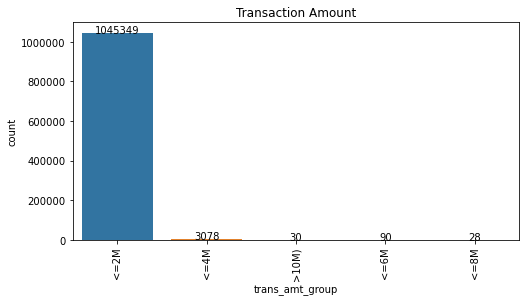

In [13]:
# Amount

# create a function that categorises transaction amount
def amount_bracket(transaction_amount):
    if transaction_amount <= 2000000:
        return "<=2M"
    elif transaction_amount <=4000000:
        return "<=4M"
    elif transaction_amount <=6000000:
        return "<=6M"
    elif transaction_amount <= 8000000:
        return "<=8M"
    else: 
        return ">10M)"

    
# Create a new column for age category
OPFD1["trans_amt_group"] = OPFD1["transaction_amount"].apply(amount_bracket)


#Create visualization for IsFraud using Fraud column
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "trans_amt_group", data = OPFD1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Amount')






Most of the Transaction Amount (about 99.6%) were between 0 and 2 Million

Text(0.5, 1.0, 'Transaction Originator Old Balance')

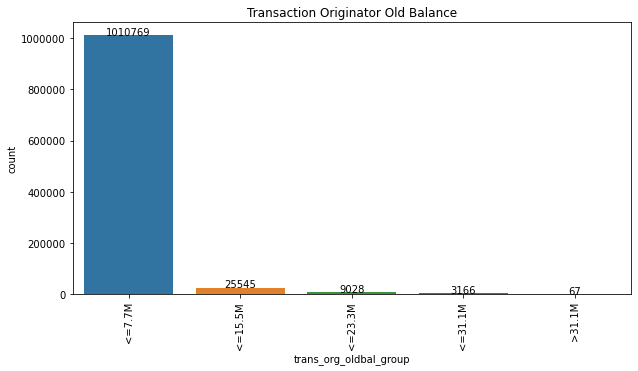

In [69]:
# transaction originator old balance(toob)

# create a function that categorises transaction amount
def toob_bracket(transaction_originator_oldbalance):
    if transaction_originator_oldbalance <= 7780000:
        return "<=7.7M"
    elif transaction_originator_oldbalance <=15560000:
        return "<=15.5M"
    elif transaction_originator_oldbalance <=23340000:
        return "<=23.3M"
    elif transaction_originator_oldbalance <= 31120000:
        return "<=31.1M"
    else: 
        return ">31.1M"


    
# Create a new column for age category
OPFD1["trans_org_oldbal_group"] = OPFD1["transaction_originator_oldbalance"].apply(toob_bracket)


#Create visualization for IsFraud using Fraud column
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "trans_org_oldbal_group", data = OPFD1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Originator Old Balance')


The balance for the transaction Orginators before transactions were mostly in group less than or equal to 7.7 Million balance. So, the higher the account balance, the lesser the nuumber of people in that category

Text(0.5, 1.0, 'Transaction Originator New Balance')

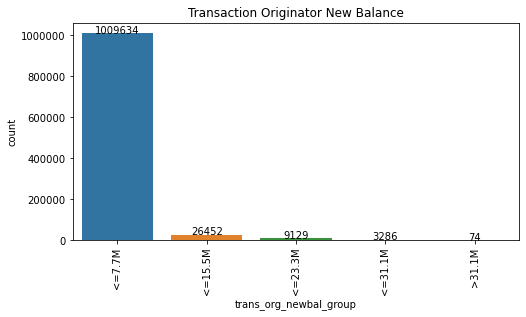

In [72]:
# transaction originator new balance(tonb)

# create a function that categorises transaction amount
def tonb_bracket(transaction_originator_newbalance):
    if transaction_originator_newbalance <= 7780000:
        return "<=7.7M"
    elif transaction_originator_newbalance <=15560000:
        return "<=15.5M"
    elif transaction_originator_newbalance <=23340000:
        return "<=23.3M"
    elif transaction_originator_newbalance <= 31120000:
        return "<=31.1M"
    else: 
        return ">31.1M"

    
# Create a new column for age category
OPFD1["trans_org_newbal_group"] = OPFD1["transaction_originator_newbalance"].apply(tonb_bracket)


#Create visualization for IsFraud using Fraud column
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "trans_org_newbal_group", data = OPFD1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Originator New Balance')

The balance for the transaction Orginators after transactions were mostly in group less than or equal to 7.7 Million balance. So, the higher the account balance, the lesser the nuumber of people in that category

Text(0.5, 1.0, 'Recipient Old Balance')

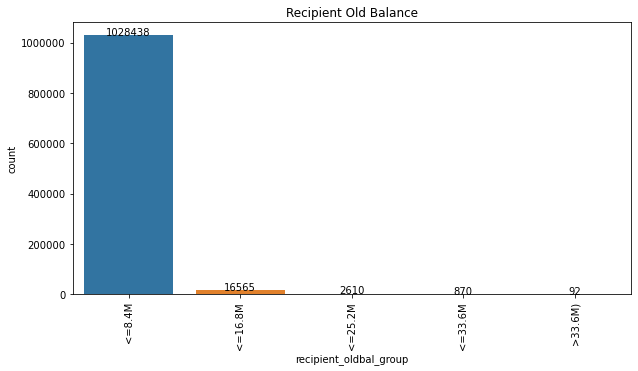

In [16]:
# recipient old balance(rob)

# create a function that categorises transaction amount
def rob_bracket(recipient_oldbalance):
    if recipient_oldbalance <= 8420000:
        return "<=8.4M"
    elif recipient_oldbalance <= 16840000:
        return "<=16.8M"
    elif recipient_oldbalance <= 25260000:
        return "<=25.2M"
    elif recipient_oldbalance <= 33680000:
        return "<=33.6M"
    else:
        return ">33.6M)"

    
# Create a new column for age category
OPFD1["recipient_oldbal_group"] = OPFD1["recipient_oldbalance"].apply(rob_bracket)

#Create visualization for IsFraud using Fraud column
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "recipient_oldbal_group", data = OPFD1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Recipient Old Balance')

Most of the Recipient Account balance before transaction were between 0 and 8.4 Million (about 98%)

Text(0.5, 1.0, 'Recipient New Balance')

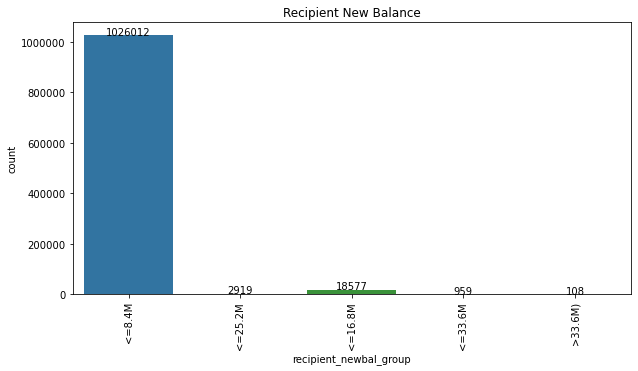

In [17]:
# recipient new balance(rnb)

# create a function that categorises transaction amount
def rnb_bracket(recipient_newbalance):
    if recipient_newbalance <= 8420000:
        return "<=8.4M"
    elif recipient_newbalance <= 16840000:
        return "<=16.8M"
    elif recipient_newbalance <= 25260000:
        return "<=25.2M"
    elif recipient_newbalance <= 33680000:
        return "<=33.6M"
    else:
        return ">33.6M)"

    
# Create a new column for age category
OPFD1["recipient_newbal_group"] = OPFD1["recipient_newbalance"].apply(rnb_bracket)


#Create visualization for IsFraud using Fraud column
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "recipient_newbal_group", data = OPFD1)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Recipient New Balance')

There was an increase in the recipent balance across the different groups by 3%, 20%, 0.9%, and 0.2% (<=25.2M, <=16.8M, <=33.6M, >33.6M respectively) except for <= 8.4M; when compared to the balance before transaction

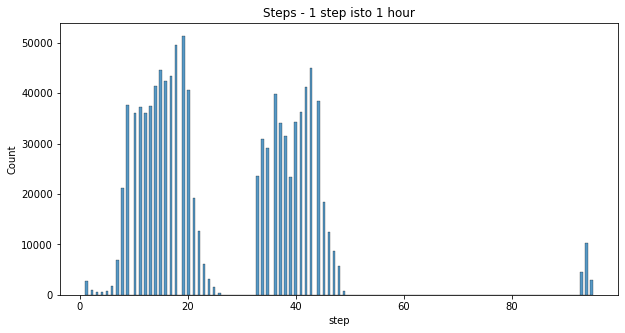

In [18]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'step', data = OPFD1)
plt.title('Steps - 1 step isto 1 hour')
plt.show()

Most frequent step is 19

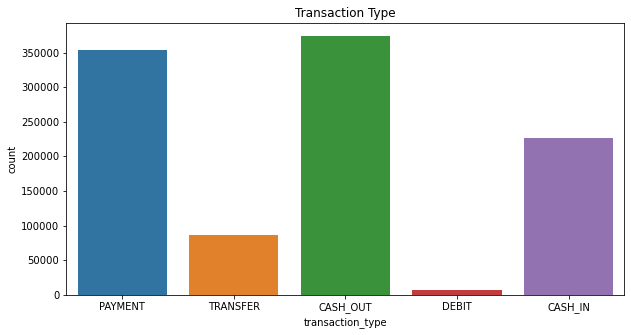

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'transaction_type', data = OPFD1)
plt.title('Transaction Type')
plt.show()

Most frequent Transaction Type used was the Cash_out Type

<AxesSubplot:title={'center':'Fraud Transaction'}, ylabel='Fraud'>

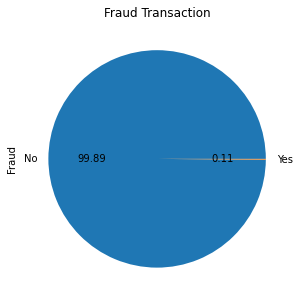

In [20]:
# Fraud (1 = Yes, 0 = No)

# Create Function that categorise Fraud
def fraud(isFraud):
    if isFraud == 1:
        return 'Yes'
    else:
        return 'No'
    
OPFD1['Fraud'] = OPFD1['isFraud'].apply(fraud)

#Create visualization for IsFraud using Fraud column
plt.figure(figsize = (10,5))
plt.title('Fraud Transaction')
OPFD1['Fraud'].value_counts(normalize=True).plot.pie(autopct="%.2f")


About 99.89% of the Transaction wasn't Fraudulent, only 0.11% was detected Fraudulent

##### Bivariate Analysis

Charts with two variable (columns) at a time. 


Text(0.5, 1.0, 'Transaction type by  Transaction Amount')

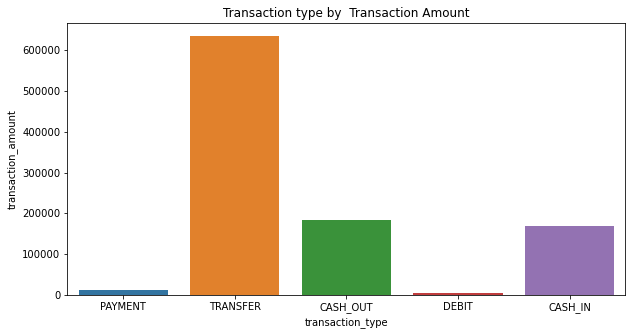

In [21]:
# Transaction Type by Transaction Amount
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.barplot( x = "transaction_type", y = "transaction_amount", data = OPFD1, ci = None)
plt.title('Transaction type by  Transaction Amount')

Transactions with the highest Amount was "Transfer" Transaction type, "Debit" had the least transaction Amount.

Text(0.5, 1.0, 'Transaction type by  Steps')

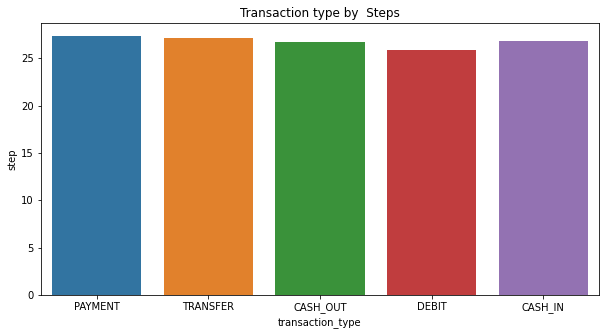

In [22]:
# Transaction Type by Steps
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.barplot(ax =ax1, x = "transaction_type", y = "step", data = OPFD1, ci = None)
plt.title('Transaction type by  Steps')

"Payment" had the highest Steps. This means Payment transactions took longer hours to be processed.

Text(0.5, 1.0, 'Transaction Amount by Fraud Detection')

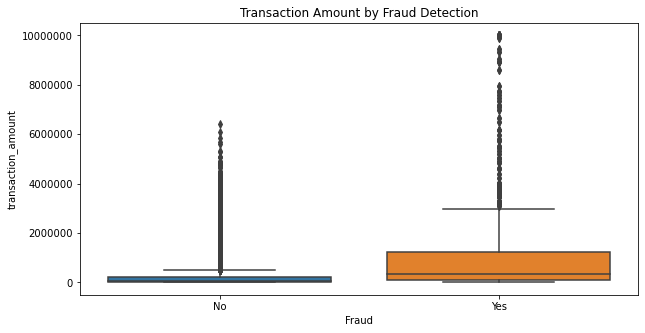

In [23]:
# Transaction Type by Fraud
plt.figure(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.boxplot(x = "Fraud", y = "transaction_amount", data = OPFD1)
plt.title('Transaction Amount by Fraud Detection')

This chart shows that with Higher transaction amount, there is a tendancy for it to be a Fraud transaction. This explains why EFCC Freeze an account when a very huge amount of money is detected in it or a huge transaction is done.

Text(0.5, 1.0, 'Transaction Amount by Step')

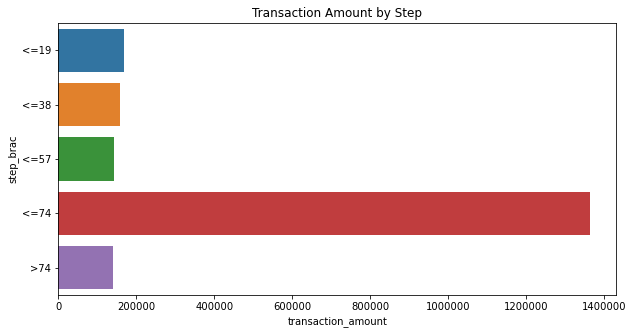

In [24]:
# Transaction Amount by Steps

# create a function that categorises steps
def step_bracket(step):
    if step <= 19:
        return "<=19"
    elif step <= 38:
        return "<=38"
    elif step <= 57:
        return "<=57"
    elif step <= 74:
        return "<=74"
    else:
        return ">74"

# Create a column for step bracket    
OPFD1["step_brac"] = OPFD1["step"].apply(step_bracket)

# Visualization
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.barplot(x = "transaction_amount", y = "step_brac", data = OPFD1, ci = None)
plt.title('Transaction Amount by Step')

##### Multivariate

Charts with more than two variable (columns) at a time. 


Text(0.5, 1.0, 'Transaction type by Transaction Amount Per Fraud Detection')

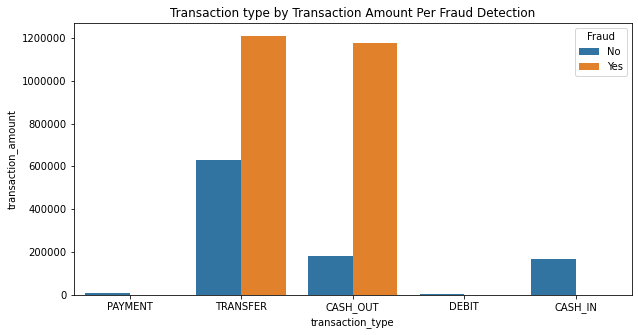

In [25]:
# Transaction Type by Steps
fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.barplot(ax =ax1, x = "transaction_type", y = "transaction_amount", data = OPFD1, hue = "Fraud", ci = None)
plt.title('Transaction type by Transaction Amount Per Fraud Detection')

This chart shows that with Higher transaction amount, there is a tendancy for it to be a Fraud transaction, That is "Transfer" and "Cash_Out" has fraudulent detection.

<AxesSubplot:>

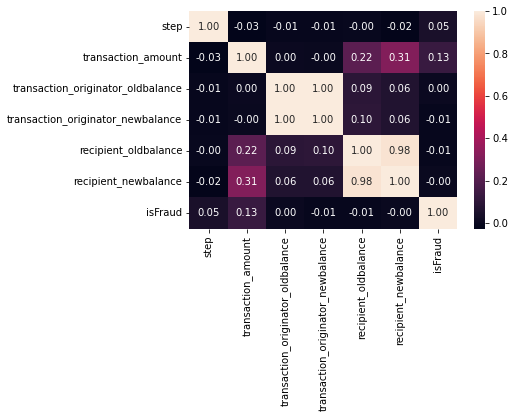

In [26]:
# Correlation analysis

correl = OPFD1.corr()

# num = 10

# cols = correl.nlargest(num, "target")["target"].index
sns.heatmap(correl, cbar=True, annot=True,fmt=".2f")

* There is a very strong positive relationship between recipient old and new balance; 
* There is a weak positive relationship between recipient new balance and  transcation amount, and between recipient old balance and  transcation amount;
* There is a very weak positive relationship between Isfraud and  transcation amount.

### Summary of Findings

1. With Higher transaction amount, there is a tendancy for it to be a Fraud transaction, That is "Transfer" and "Cash_Out" has fraudulent detection.
2. "Payment" had the highest Steps. This means Payment transactions took longer hours to be processed.
3. About 99.89% of the Transaction wasn't Fraudulent, only 0.11% was detected Fraudulent.
4. Most of the Recipient Account balance before transaction were between 0 and 8.4 Million (about 98%)
5. There was an increase in the recipent balance across the different groups by 3%, 20%, 0.9%, and 0.2% (<=25.2M, <=16.8M, <=33.6M, >33.6M respectively) except for <= 8.4M; when compared to the balance before transaction

## Modelling

In this section, models will be trained and evaluated 

### Features Engineering


#### One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of it's own. The values in this new column will be either 1 or 0 to show whether that value exists or not.


In [27]:
# Convert all categorical column to numeric using pd.get_dummies() and Transaction type is the categorical data

transaction_type_num = pd.get_dummies(OPFD1["transaction_type"])
transaction_type_num.head(2)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0


In [28]:
#join the encoded variable back to the main dataframe using pd.concat() 
#passing both OPFD1 and transaction_type_num as a list of their names

OPFD1 = pd.concat([OPFD1, transaction_type_num], axis = 1)

# View data
print(OPFD1.shape)
OPFD1.head(2)

(1048575, 20)


,step,transaction_type,transaction_amount,transaction_originator_oldbalance,transaction_originator_newbalance,recipient_oldbalance,recipient_newbalance,isFraud,trans_amt_group,trans_org_oldbal_group,trans_org_newbal_group,recipient_oldbal_group,recipient_newbal_group,Fraud,step_brac,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,<=19,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,<=19,0,0,0,1,0


In [29]:
# drop other categorical data columns that were created for visualization purpose

OPFD1.drop(['trans_amt_group',
       'trans_org_oldbal_group', 'trans_org_newbal_group',
       'recipient_oldbal_group', 'recipient_newbal_group', 'Fraud',
       'step_brac'], axis = 1, inplace = True)

OPFD1.head(2)

,step,transaction_type,transaction_amount,transaction_originator_oldbalance,transaction_originator_newbalance,recipient_oldbalance,recipient_newbalance,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0


In [30]:
OPFD1.drop('transaction_type', axis = 1, inplace = True)

In [31]:
OPFD1.head(2)

,step,transaction_amount,transaction_originator_oldbalance,transaction_originator_newbalance,recipient_oldbalance,recipient_newbalance,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0


### Choose  Target

In [32]:
y = OPFD1['isFraud'] 
X = OPFD1.drop('isFraud', axis=1)

In [33]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [34]:
X.head()

,step,transaction_amount,transaction_originator_oldbalance,transaction_originator_newbalance,recipient_oldbalance,recipient_newbalance,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


## Preparing the models

### Train Test Split

In [35]:
#Import train_test_split
from sklearn.model_selection import train_test_split
#split into training and validation sets using a 40% split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

###### Scaling data
scaling of the data makes it easy for a model to learn and understand the problem, it also leads to more accurate results.

In [36]:
# Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [37]:
#data scaling steps for train data set
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [38]:
#data scaling test for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

## Import ML algorithms and initialize them

In [39]:
# Importation of necessary libraries

# Machine Learning
from sklearn.model_selection import cross_val_score, cross_val_predict

#ML Algorithms
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#ML Metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix


In [40]:
# initialization of Algorithms

In [41]:
#Create a svm Classifier (intialize)
clf = svm.SVC(kernel='linear') # Linear Kernel

In [42]:
# Initialize algorithms KNeighborsClassifier

KN = KNeighborsClassifier()

In [43]:
# Initialize algorithms LogisticRegression
LR = LogisticRegression()

In [44]:
RF = RandomForestClassifier()

In [45]:
classifiers = [clf,KN,LR,RF]

## Train and Test the models

In [46]:
# Create a function to train and evaluate model
def trainer(model,X_train,y_train,X_test,y_test):
    #fit the model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    # print evaluation metrics
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test)) 

In [47]:
# loop through all models
for model in classifiers:
    trainer(model,X_train,y_train,X_test,y_test)


For SVC, Accuracy score is 0.9991154662279761 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419323
           1       0.22      1.00      0.37       107

    accuracy                           1.00    419430
   macro avg       0.61      1.00      0.68    419430
weighted avg       1.00      1.00      1.00    419430


For KNeighborsClassifier, Accuracy score is 0.9994325632405884 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419174
           1       0.52      0.97      0.68       256

    accuracy                           1.00    419430
   macro avg       0.76      0.98      0.84    419430
weighted avg       1.00      1.00      1.00    419430


For LogisticRegression, Accuracy score is 0.9991798393057244 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419290
           1       0.29      0.98      0.44       140

   

###### Evaluating with confusion matrix -  precision and recall

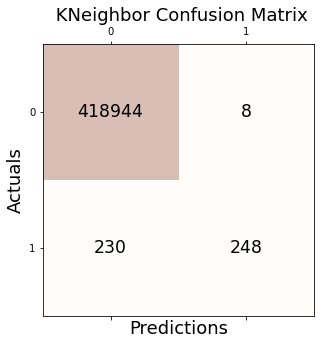

Precision: 0.969
Recall: 0.519


In [48]:
# Calculate the confusion matrix for KNeighborClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=KN.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' KNeighbor Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, KN.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, KN.predict(X_test)))

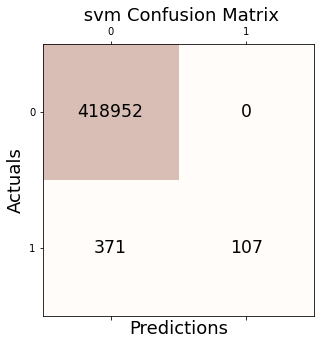

Precision: 1.000
Recall: 0.224


In [49]:
# Calculate the confusion matrix for svm Classifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' svm Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, clf.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, clf.predict(X_test)))

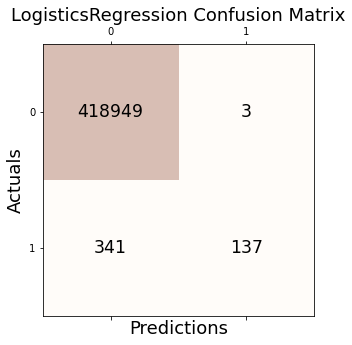

Precision: 0.979
Recall: 0.287


In [50]:
# Calculate the confusion matrix for LogisticsRegressionClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('LogisticsRegression Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, LR.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, LR.predict(X_test)))

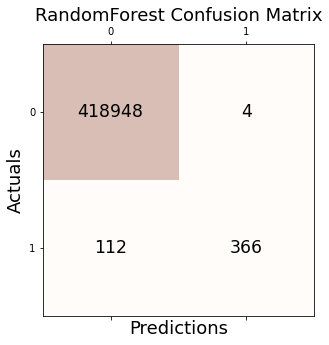

Precision: 0.989
Recall: 0.766


In [51]:
# Calculate the confusion matrix for RandomForestClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RandomForest Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, RF.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, RF.predict(X_test)))

### Inspect Feature Importances

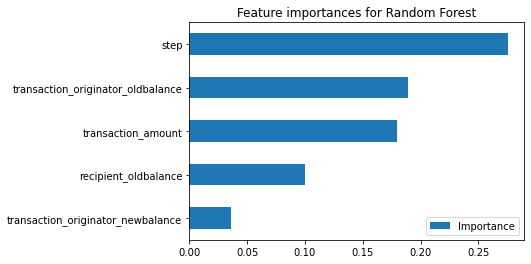

In [52]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 5 feature importances, sorted
RF_importances[:5].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

In [53]:
#get these top 5 importances
RF_importances[:5].sort_values(by='Importance').index.values

array(['transaction_originator_newbalance', 'recipient_oldbalance',
       'transaction_amount', 'transaction_originator_oldbalance', 'step'],
      dtype=object)

### A Bit of Feature Selection

In [54]:
#create a new X train with only 5 features
X_train2 = X_train[['step', 'transaction_originator_oldbalance', 'transaction_amount', 'recipient_oldbalance', 
                    'transaction_originator_newbalance']]
X_train2.head(2)

,step,transaction_originator_oldbalance,transaction_amount,recipient_oldbalance,transaction_originator_newbalance
615267,0.449877,-0.294978,-0.552918,-0.424744,-0.298041
412022,-0.573441,-0.291040,-0.538115,-0.424744,-0.298041


In [55]:
X_test2 = X_test[['step', 'transaction_originator_oldbalance', 'transaction_amount', 'recipient_oldbalance', 
                    'transaction_originator_newbalance']]

In [56]:
#train and predict
RF.fit(X_train2,y_train)
prediction2 = RF.predict(X_test2)

print(accuracy_score(prediction2,y_test))

0.9996185299096393


### Evaluating with Cross Validation

In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

It helps to compare and select an appropriate model for the specific predictive modeling problem.

In [57]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=2, shuffle=True)

In [58]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))
    

In [59]:
#train and predict, looping through the list of models
for model in classifiers:
    trainer_with_cv(model,X_train2,y_train)
    


For SVC, Accuracy score is 0.9991289766270096 


For KNeighborsClassifier, Accuracy score is 0.9994405105341377 


For LogisticRegression, Accuracy score is 0.9991703025534655 


For RandomForestClassifier, Accuracy score is 0.9996423717902868 



In [60]:
#create function to train a model with cross validations and evaluate precision
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    # report performance
    print('\nFor {}, Precision is {} \n'.format(model.__class__.__name__,mean(scores)))

In [61]:
#train and predict, looping through the list of models
for model in classifiers:
    trainer_with_cv(model,X_train2,y_train)


For SVC, Precision is 0.9916666666666668 


For KNeighborsClassifier, Precision is 0.9757575757575758 


For LogisticRegression, Precision is 0.91281045751634 


For RandomForestClassifier, Precision is 0.9731721115925799 



In [62]:
#create function to train a model with cross validations and evaluate recall
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print('\nFor {}, Recall is {} \n'.format(model.__class__.__name__,mean(scores)))

In [63]:
#train and predict, looping through the list of models
for model in classifiers:
    trainer_with_cv(model,X_train2,y_train)


For SVC, Recall is 0.1769344951587283 


For KNeighborsClassifier, Recall is 0.48251000286174045 


For LogisticRegression, Recall is 0.2388696163127603 


For RandomForestClassifier, Recall is 0.6870721949729691 



## Interpret Results



* The purpose of this project is to predict online payment fraud. 
* The best model that predicts with lesser error is to be chosen, subjecting them to the different evaluation metrics including k-fold cross validation (accuracy, precision and recall). 
* The confusion matrix displays the error value for each model in terms of False Positive (Where the model predicts an online payment to be fraud when they actually aren't Fraud - Precision) and False Negative (Where the model predicts an online payment not to be fraud where as it's fraud - Recall). 
* After Cross Validation, the model with the highest recall will be deployed. Recall is the most relevant matrix for evaluation in this business problem. This is because, the effect of the error (Recall) on the business if not addressed will be massive compared to that of Precision.

## Summary

Model to deploy for BB PLC

RandomForest Classifier: For this business problem, Recall score is of more relevancy and RandomForest Classifier has highest recall score compared to other models. Hence, It should be deployed by Blossom Bank PLC for Online Payment Fraud detection, as it has 68% Recall and Accuracy score of 99%.